In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Interaction Count Plot

In [413]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find residues where interactions are made

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty lists for column counts and residue numbers
int_counts = []
resnums = []

# loop through sum columns and count interactions that don't have -999 energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

#len([x for x in int_counts if x != 0])

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])

# drop columns from df if no interactions are made at that residue
for resnum in non_int_resnums:
    for col in df.columns:
        if resnum in col:
            df.drop([col], axis = 1, inplace = True)

display(df)

# get list of interacting residues

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
resnums = []

for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)
    
print(resnums)
print(len(resnums))

['1.27', '1.30', '1.31', '1.34', '1.35', '1.36', '1.38', '1.39', '1.42', '1.43', '2.39', '2.41', '2.45', '2.48', '2.50', '2.53', '2.54', '2.56', '2.57', '2.58', '2.59', '2.60', '2.61', '2.62', '2.63', '2.64', '2.65', '2.66', '2.67', '2.68', '3.21', '3.23', '3.24', '3.25', '3.26', '3.28', '3.29', '3.30', '3.32', '3.33', '3.34', '3.35', '3.36', '3.37', '3.39', '3.40', '3.41', '3.44', '3.45', '4.45', '4.46', '4.47', '4.50', '4.52', '4.54', '4.56', '4.57', '4.58', '4.60', '4.61', '4.64', '4.66', '5.31', '5.35', '5.36', '5.38', '5.39', '5.40', '5.41', '5.42', '5.43', '5.44', '5.45', '5.46', '5.47', '5.48', '5.49', '5.50', '5.53', '6.44', '6.45', '6.47', '6.48', '6.49', '6.50', '6.51', '6.52', '6.53', '6.54', '6.55', '6.57', '6.58', '6.59', '6.60', '6.61', '6.62', '7.28', '7.30', '7.31', '7.32', '7.33', '7.34', '7.35', '7.36', '7.37', '7.38', '7.39', '7.40', '7.41', '7.42', '7.43', '7.45', '7.46', '7.47']
114


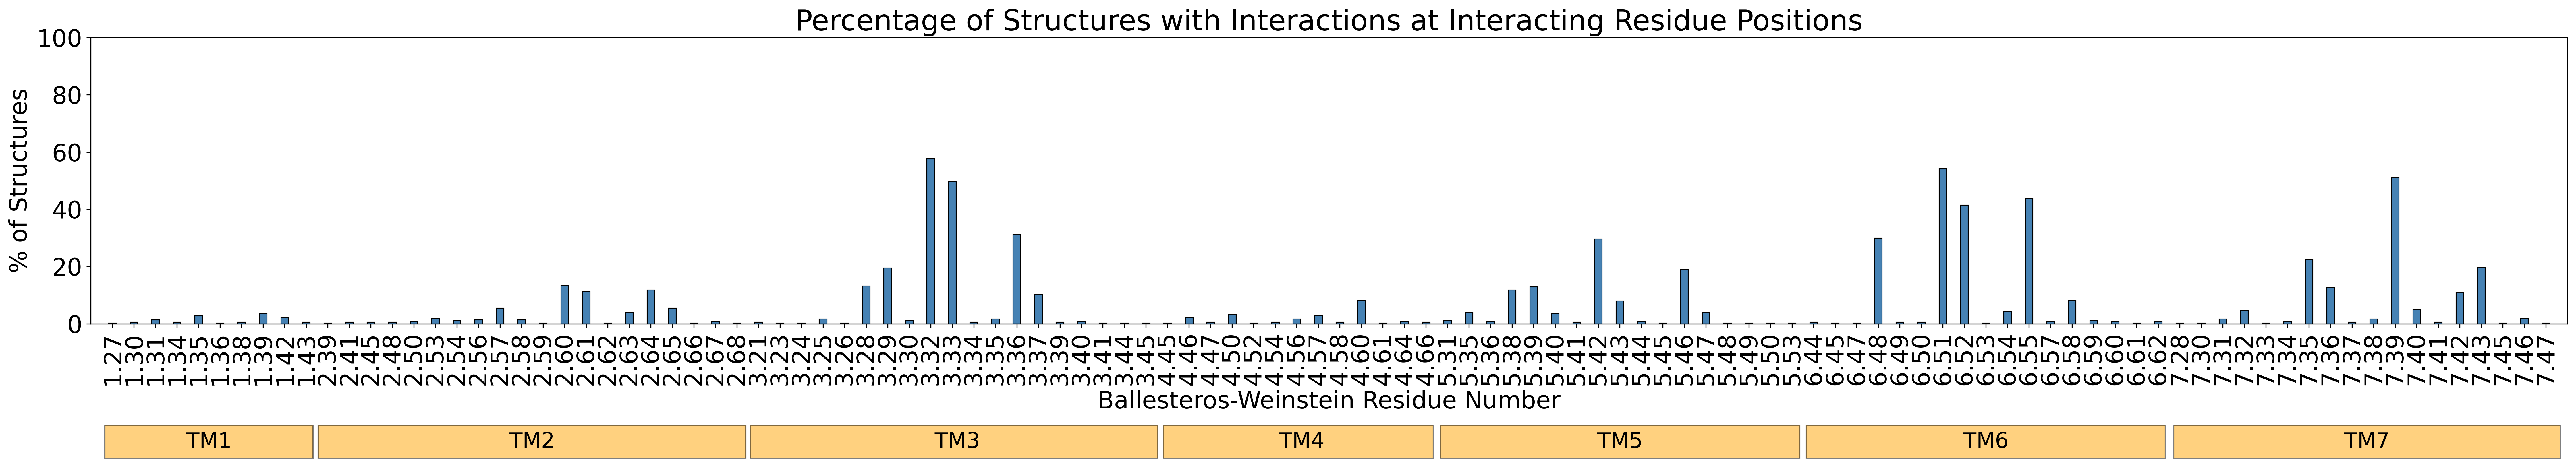

In [414]:
# 30 x 5 interaction % plot
matplotlib.rcParams['figure.figsize'] = [30, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)
x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# calculate interaction counts as percentages
int_counts_percs = []
for x in int_counts:
    int_counts_percs.append((x/364)*100)
    
# create rectangles for bar plot
rects = ax.bar(resnums, int_counts_percs, width, label=resnums, color = 'steelblue', edgecolor = "black", linewidth = 0.75)

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Percentage of Structures with Interactions at Interacting Residue Positions", fontsize = 24)
ax.set_ylabel('% of Structures', fontsize = 20)
ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.0825, -0.05, "           TM1           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.2075, -0.05, "                           TM2                           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.37075, -0.05, "                          TM3                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5040, -0.05, "                TM4               ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.6285, -0.05, "                      TM5                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.77, -0.05, "                      TM6                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.9175, -0.05, "                        TM7                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('plots/364_int_perc_plot_30x5.jpg', bbox_inches='tight')

---
## Residue Positions vs. Interaction Type Frequency

In [415]:
# get per residue count of each interaction type

resnums = []
int_types = []
residue_int_counts = []
prior_resnum = 'res'

# get interaction type columns
inttype_cols = [col for col in df.columns if 'inttype' in col]

for col in inttype_cols:
    resnum = col[:4]
    
    # if dealing with a new residue (inttype1 columns)
    if resnum != prior_resnum:
        resnums.append(resnum)
        int_type_dict = {}
    
        counts = list(df.loc[(df[col] != 'None') & (df[col].notnull())][col].value_counts())
        col_values = df.loc[df[col] != 'None'][col].value_counts().index.tolist()
        if len(col_values) > 0: # if there there are interactions occuring for the residue
            print(resnum, col_values, counts)
            for x in col_values: # for each interaction type
                if x not in int_types and x != 'None': # get unique interaction types
                    int_types.append(x)
                int_type_dict[x] = counts[col_values.index(x)] # create dictionary with per residue counts of each interaction
        else:
            print(resnum, [], 0)
            
    # if dealing with the same residue (inttype2 columns)        
    else:
        
        counts = list(df.loc[(df[col] != 'None') & (df[col].notnull())][col].value_counts())
        col_values = df.loc[df[col] != 'None'][col].value_counts().index.tolist()
        if len(col_values) > 0:
            print(resnum, col_values, counts)
            for x in col_values:
                if x not in int_types and x != 'None': # get unique interaction types
                    int_types.append(x)
                if x in int_type_dict: # if the interaction type is already in the dictionary
                    int_type_dict[x] += counts[col_values.index(x)] # create dictionary with per residue counts of each interaction
                   # print(int_type_dict) # check to see that interaction type counts are being added properly
        else:
            print(resnum, [], 0)
        
        residue_int_counts.append(int_type_dict)
    prior_resnum = resnum

#print(int_types)

# create list with sublists for interaction type counts
int_counts = [[] for _ in range(len(int_types))]

# loop through each int. type and int. count dictionary to count the number of interactions per type, per structure
for count_dict in residue_int_counts:    
    for type in int_types:
        if type in count_dict:
            int_counts[int_types.index(type)].append(count_dict[type])
        else:
            int_counts[int_types.index(type)].append(0) # if the key doesn't exist in count_dict, append 0 since no interaction of that type is made
            
#print(int_counts)

int_type_count_dict = dict(zip(int_types, int_counts))

print('\nNumber of interactions at each residue by type:\n')
print(int_type_count_dict)
            

1.27 ['Hbond'] [1]
1.27 ['Arene'] [1]
1.30 ['Hbond'] [2]
1.30 ['Hbond'] [1]
1.31 ['Hbond'] [5]
1.31 ['Hbond', 'Ionic'] [4, 1]
1.34 ['Hbond'] [2]
1.34 [] 0
1.35 ['Distance', 'Hbond', 'Arene'] [12, 6, 4]
1.35 ['Distance', 'Hbond'] [6, 2]
1.36 ['Hbond'] [1]
1.36 [] 0
1.38 ['Arene', 'Distance'] [2, 1]
1.38 [] 0
1.39 ['Hbond', 'Distance'] [13, 5]
1.39 ['Hbond', 'Distance', 'Arene'] [1, 1, 1]
1.42 ['Hbond', 'Arene'] [5, 3]
1.42 ['Hbond'] [4]
1.43 ['Hbond', 'Distance'] [2, 1]
1.43 ['Arene', 'Distance'] [1, 1]
2.39 ['Hbond'] [1]
2.39 [] 0
2.41 ['Distance', 'Arene'] [2, 2]
2.41 ['Arene', 'Distance'] [2, 1]
2.45 ['Distance', 'Hbond'] [3, 2]
2.45 [] 0
2.48 ['Arene'] [2]
2.48 ['Arene'] [2]
2.50 ['Hbond', 'Distance'] [3, 2]
2.50 ['Distance', 'Hbond'] [1, 1]
2.53 ['Distance', 'Hbond', 'Arene'] [10, 5, 2]
2.53 ['Distance', 'Arene', 'Hbond'] [5, 2, 1]
2.54 ['Hbond', 'Distance'] [4, 2]
2.54 ['Hbond'] [2]
2.56 ['Hbond', 'Distance'] [5, 2]
2.56 ['Hbond', 'Distance'] [2, 1]
2.57 ['Distance', 'Hbond', 'Are

In [416]:
# get count of number of structures with each interaction type at each position

residue_structure_count_dict = {'Hbond': [0] * len(resnums),
                                'Arene': [0] * len(resnums),
                                'Ionic': [0] * len(resnums),
                                'Distance': [0] * len(resnums),
                                'Covalent': [0] * len(resnums)
                               }

# get interaction type columns
inttype_cols1 = [col for col in df.columns if 'inttype1' in col]
inttype_cols2 = [col for col in df.columns if 'inttype2' in col]

# for int type 1 columns, add to each residue type in the structure count dict if the interaction is present at that residue
for col in inttype_cols1:
    resnum = col[:4]
    for row in df[col]:
        if row == 'Hbond':
            residue_structure_count_dict['Hbond'][resnums.index(resnum)] += 1
        elif row == 'Arene':
            residue_structure_count_dict['Arene'][resnums.index(resnum)] += 1
        elif row == 'Ionic':
            residue_structure_count_dict['Ionic'][resnums.index(resnum)] += 1
        elif row == 'Distance':
            residue_structure_count_dict['Distance'][resnums.index(resnum)] += 1
        elif row == 'Covalent':
            residue_structure_count_dict['Covalent'][resnums.index(resnum)] += 1

# for int type 2 columns, only to a residue type if that residue type has not yet been counted at that residue
for col in inttype_cols2:
    resnum = col[:4]
    for row in df[col]:
        if row == 'Hbond' and residue_structure_count_dict['Hbond'][resnums.index(resnum)] == 0:
            residue_structure_count_dict['Hbond'][resnums.index(resnum)] += 1
        elif row == 'Arene' and residue_structure_count_dict['Arene'][resnums.index(resnum)] == 0:
            residue_structure_count_dict['Arene'][resnums.index(resnum)] += 1
        elif row == 'Ionic' and residue_structure_count_dict['Ionic'][resnums.index(resnum)] == 0:
            residue_structure_count_dict['Ionic'][resnums.index(resnum)] += 1
        elif row == 'Distance' and residue_structure_count_dict['Distance'][resnums.index(resnum)] == 0:
            residue_structure_count_dict['Distance'][resnums.index(resnum)] += 1
        elif row == 'Covalent' and residue_structure_count_dict['Covalent'][resnums.index(resnum)] == 0:
            residue_structure_count_dict['Covalent'][resnums.index(resnum)] += 1
            
# print(len(hbond_ints))

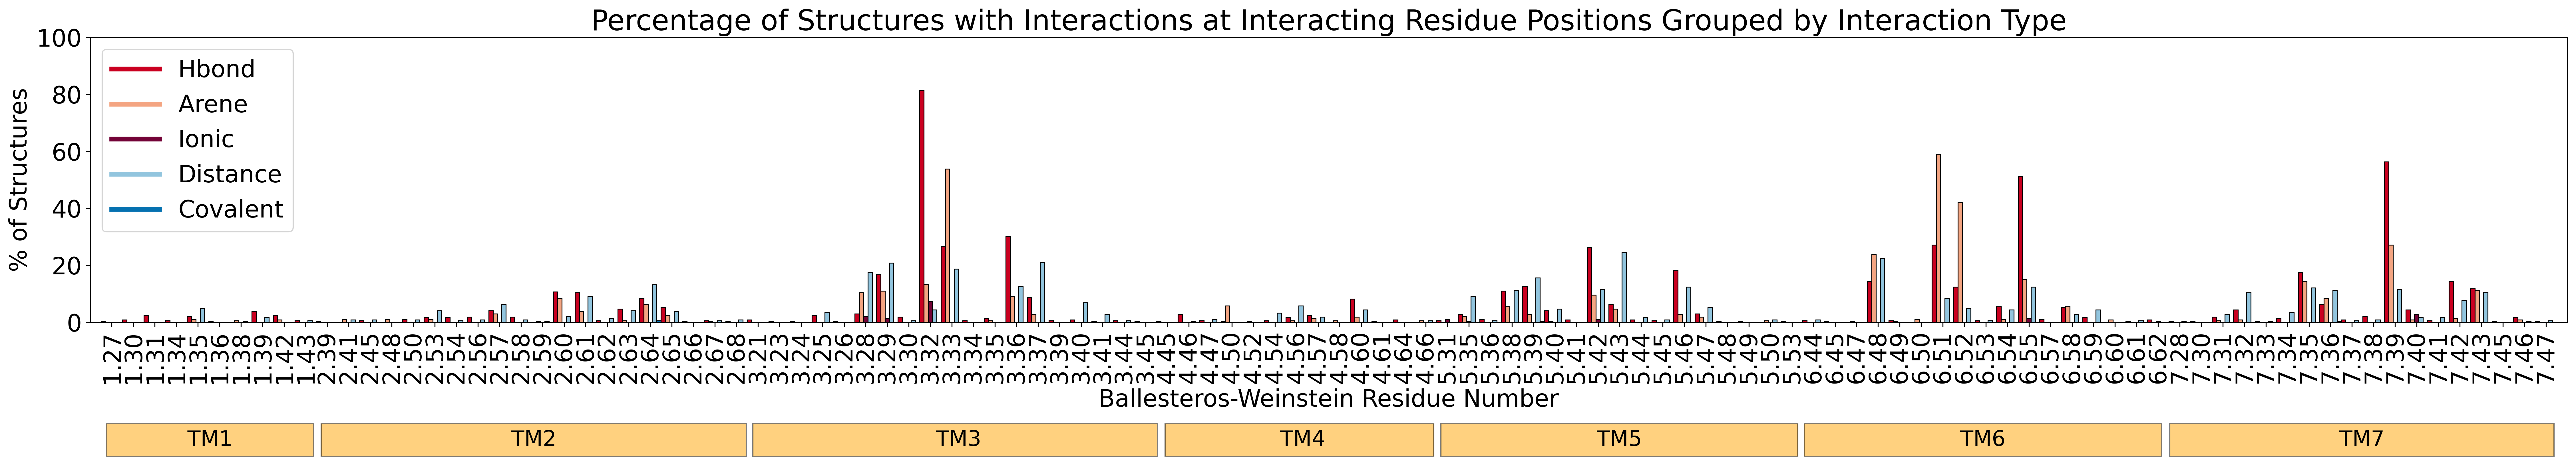

In [417]:
# 30 x 5 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [30, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

# calculate interaction counts as percentages
sublists = []
for x in residue_structure_count_dict: # get lists key values as lists
    sublists.append(int_type_count_dict[x])
    
Hbond_int_count_percs = []
Arene_int_count_percs = []
Ionic_int_count_percs = []
Distance_int_count_percs = []
Covalent_int_count_percs = []

binary_int_list = []
for x in sublists[0]:
    Hbond_int_count_percs.append((x/364)*100)
    
for x in sublists[1]:
    Arene_int_count_percs.append((x/364)*100)

for x in sublists[2]:
    Ionic_int_count_percs.append((x/364)*100)

for x in sublists[3]:
    Distance_int_count_percs.append((x/364)*100)
    
for x in sublists[4]:
    Covalent_int_count_percs.append((x/364)*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width*2), Hbond_int_count_percs, width, label=resnums, color = '#ca0020', edgecolor = "black", linewidth = 0.75)
rects2 = ax.bar(x - (width), Arene_int_count_percs, width, label=resnums, color = '#f4a582', edgecolor = "black", linewidth = 0.75)
rects3 = ax.bar(x, Ionic_int_count_percs, width, label=resnums, color = '#730337', edgecolor = "black", linewidth = 0.75)
rects4 = ax.bar(x + (width), Distance_int_count_percs, width, label=resnums, color = '#92c5de', edgecolor = "black", linewidth = 0.75)
rects5 = ax.bar(x + (width*2), Covalent_int_count_percs, width, label=resnums, color = '#0571b0', edgecolor = "black", linewidth = 0.75)

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Percentage of Structures with Interactions at Interacting Residue Positions Grouped by Interaction Type", fontsize = 24)
ax.set_ylabel('% of Structures', fontsize = 20)
ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=4),
                Line2D([0], [0], color='#f4a582', lw=4),
                Line2D([0], [0], color='#730337', lw=4),
                Line2D([0], [0], color='#92c5de', lw=4),
                Line2D([0], [0], color='#0571b0', lw=4)]

ax.legend(custom_lines, ['Hbond', 'Arene', 'Ionic', 'Distance', 'Covalent'], fontsize = 20)


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.0775, -0.05, "           TM1           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.2035, -0.05, "                           TM2                           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.3675, -0.05, "                          TM3                         ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5015, -0.05, "                TM4               ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.6260, -0.05, "                      TM5                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7675, -0.05, "                      TM6                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.9150, -0.05, "                        TM7                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.ylim([0, 100])
plt.show()

fig.savefig('plots/364_inttype_perc_plot_30x5.jpg', bbox_inches='tight')

---
## Interactions by Activation State

In [424]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])
        
# drop columns from df if no interactions are made at that residue
for resnum in non_int_resnums:
    for col in df.columns:
        if resnum in col:
            df.drop([col], axis = 1, inplace = True)
            
# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
resnums = []

for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

In [425]:
# make subset dataframes that separate the data by activation state
active_df = df.loc[df['State'] == 'Active']
inactive_df = df.loc[df['State'] == 'Inactive']
intermediate_df = df.loc[df['State'] == 'Intermediate']
other_df = df.loc[df['State'] == 'Other']

In [426]:
# find residues where interactions are made

def get_ints(df):
    # get columns with 'sum' in their name
    sum_cols = [col for col in df.columns if 'sum' in col]

    # create empty lists for column counts and residue numbers
    int_counts = []
    resnums = []

    # loop through sum columns and count interactions that don't have -999 energies
    for col in sum_cols:
        resnum = col[:4]
        resnums.append(resnum)
        count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
        int_counts.append(count)
        
    return resnums, int_counts

In [427]:
len(df[df['State'] == 'Active'])

121

In [428]:
resnums, active_int_counts = get_ints(active_df)
resnums, inactive_int_counts = get_ints(inactive_df)
resnums, intermediate_int_counts = get_ints(intermediate_df)
resnums, other_int_counts = get_ints(other_df)

In [429]:
len(active_int_counts) # this needs to output 114

114

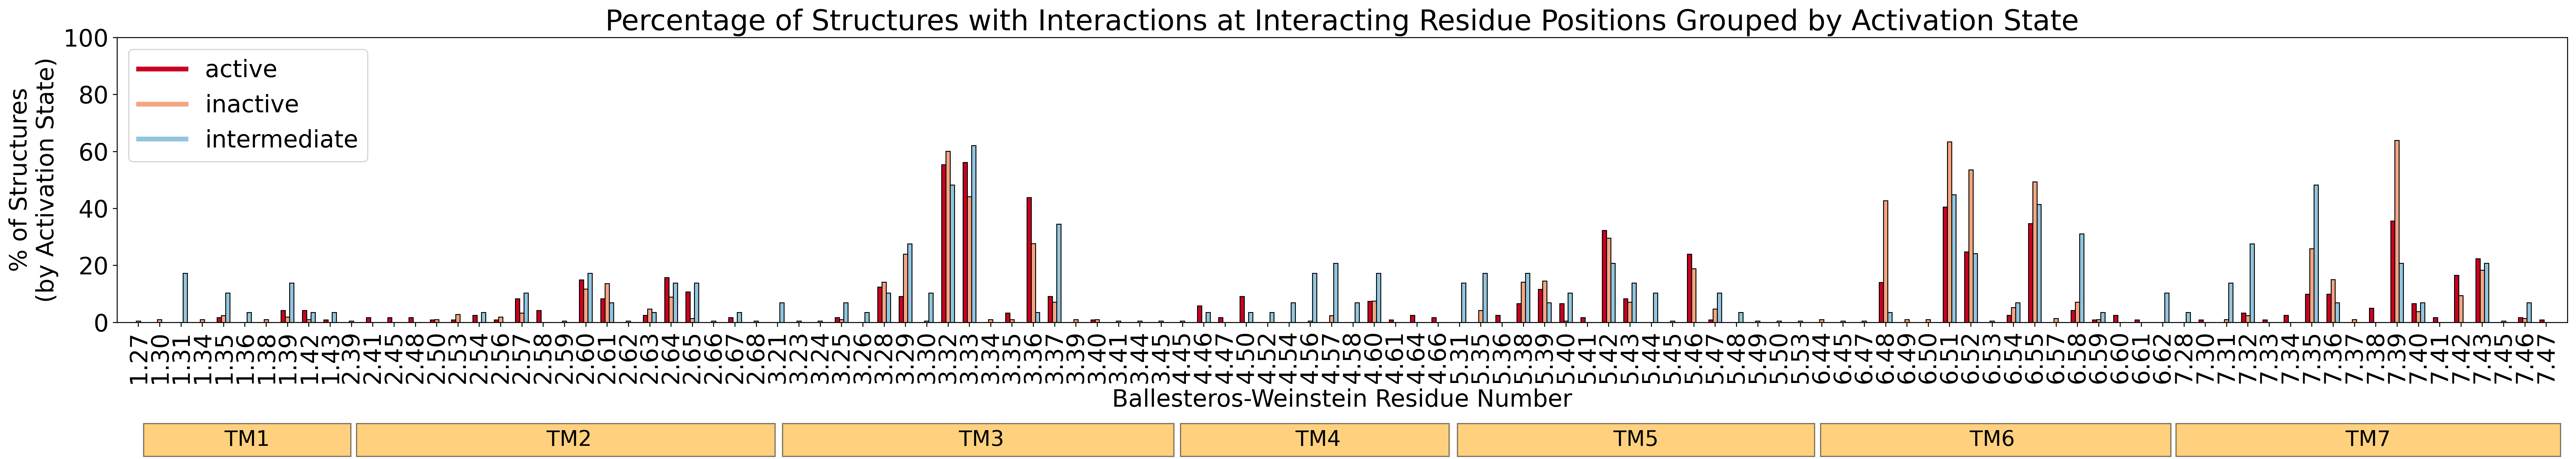

In [430]:
# 30 x 5 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [30, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

active_int_count_percs = []
inactive_int_count_percs = []
intermediate_int_count_percs = []
other_int_count_percs = []

for x in active_int_counts:
    active_int_count_percs.append((x/len(df[df['State'] == 'Active']))*100)
    
for x in inactive_int_counts:
    inactive_int_count_percs.append((x/len(df[df['State'] == 'Inactive']))*100)

for x in intermediate_int_counts:
    intermediate_int_count_percs.append((x/len(df[df['State'] == 'Intermediate']))*100)

for x in other_int_counts:
    other_int_count_percs.append((x/len(df[df['State'] == 'Other']))*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width), active_int_count_percs, width, label=resnums, color = '#ca0020', edgecolor = "black", linewidth = 0.75)
rects2 = ax.bar(x, inactive_int_count_percs, width, label=resnums, color = '#f4a582', edgecolor = "black", linewidth = 0.75)
rects3 = ax.bar(x + (width), intermediate_int_count_percs, width, label=resnums, color = '#92c5de', edgecolor = "black", linewidth = 0.75)
#rects4 = ax.bar(x + (width*1.5), other_int_count_percs, width, label=resnums, color = '#0571b0')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Percentage of Structures with Interactions at Interacting Residue Positions Grouped by Activation State", fontsize = 24)
ax.set_ylabel('% of Structures\n(by Activation State)', fontsize = 20)
ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=4),
                Line2D([0], [0], color='#f4a582', lw=4),
                Line2D([0], [0], color='#92c5de', lw=4)]

ax.legend(custom_lines, ['active', 'inactive', 'intermediate'], fontsize = 20)


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.092, -0.05, "           TM1           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.2160, -0.05, "                           TM2                          ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.3765, -0.05, "                         TM3                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5075, -0.05, "                TM4               ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.6325, -0.05, "                      TM5                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7725, -0.05, "                     TM6                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.9175, -0.05, "                        TM7                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.ylim([0, 100])
plt.show()

fig.savefig('plots/364_activationstate_perc_plot_30x5.jpg', bbox_inches='tight')

---
## Interactions by Ligand Function

In [431]:
df.Function.unique()

array(['Agonist', 'Antagonist', 'Agonist (partial)', 'Inverse agonist',
       'PAM'], dtype=object)

In [432]:
# make subset dataframes that separate the data by ligand function
agonist_df = df.loc[df['Function'] == 'Agonist']
antagonist_df = df.loc[df['Function'] == 'Antagonist']
p_agonist_df = df.loc[df['Function'] == 'Agonist (partial)']
inv_agonist_df = df.loc[df['Function'] == 'Inverse agonist']
# PAM_df = df.loc[df['Function'] == 'PAM']

In [433]:
resnums, agonist_int_counts = get_ints(agonist_df)
resnums, antagonist_int_counts = get_ints(antagonist_df)
resnums, p_agonist_int_counts = get_ints(p_agonist_df)
resnums, inv_agonist_int_counts = get_ints(inv_agonist_df)
# resnums, PAM_int_counts = get_ints(PAM_df)

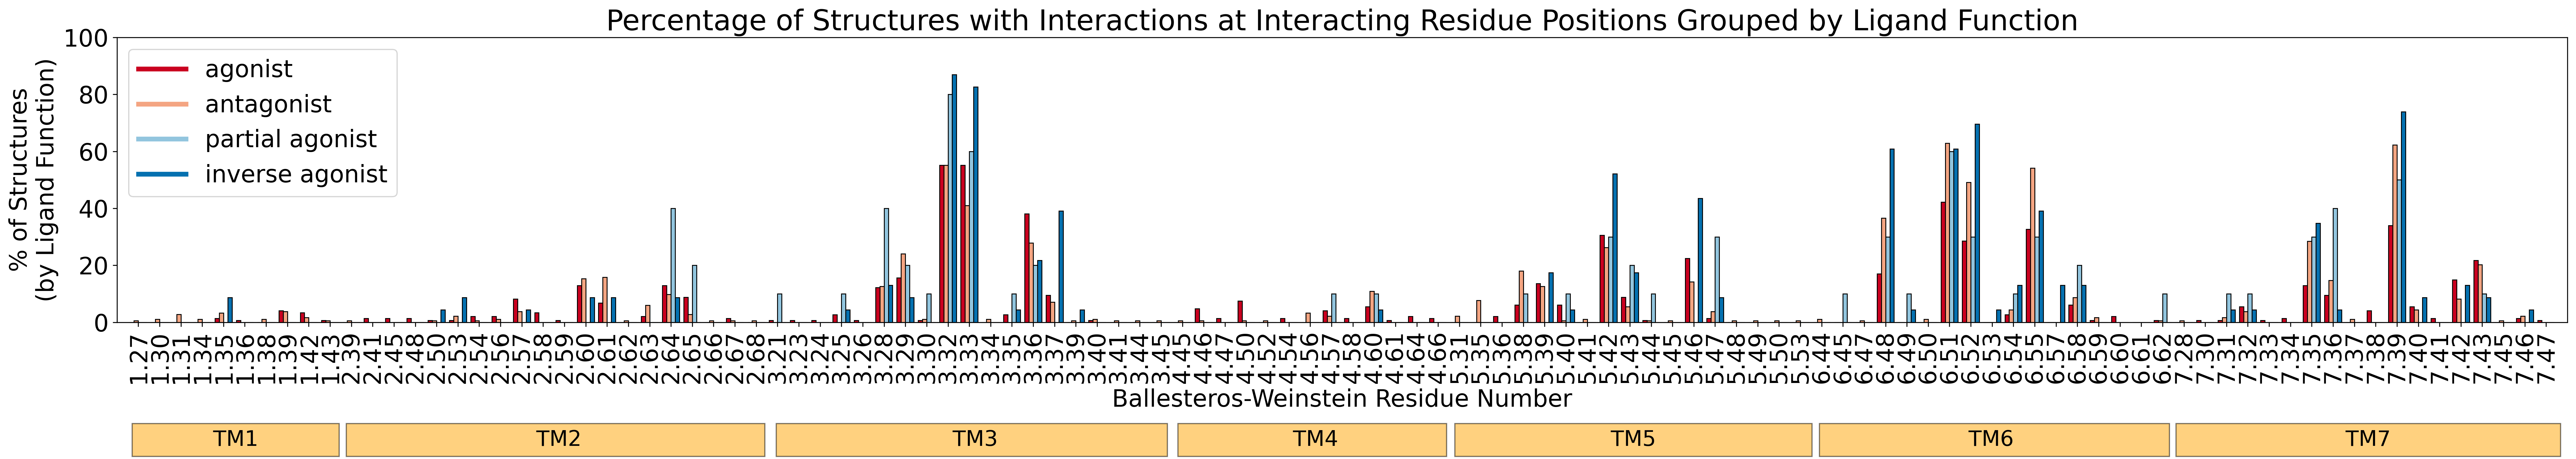

In [434]:
# 30 x 5 interaction % plot for PPT
matplotlib.rcParams['figure.figsize'] = [30, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

agonist_int_count_percs = []
antagonist_int_count_percs = []
p_agonist_int_count_percs = []
inv_agonist_int_count_percs = []
# PAM_int_count_percs = []

for x in agonist_int_counts:
    agonist_int_count_percs.append((x/len(df[df['Function'] == 'Agonist']))*100)
    
for x in antagonist_int_counts:
    antagonist_int_count_percs.append((x/len(df[df['Function'] == 'Antagonist']))*100)

for x in p_agonist_int_counts:
    p_agonist_int_count_percs.append((x/len(df[df['Function'] == 'Agonist (partial)']))*100)

for x in inv_agonist_int_counts:
    inv_agonist_int_count_percs.append((x/len(df[df['Function'] == 'Inverse agonist']))*100)

# for x in PAM_int_counts:
#     PAM_int_count_percs.append((x/364)*100)

x = np.arange(len(resnums))

# create rectangles for bar plot
rects1 = ax.bar(x - (width*1.5), agonist_int_count_percs, width, label=resnums, color = '#ca0020', edgecolor = "black", linewidth = 0.75)
rects2 = ax.bar(x - (width/2), antagonist_int_count_percs, width, label=resnums, color = '#f4a582', edgecolor = "black", linewidth = 0.75)
rects3 = ax.bar(x + (width/2), p_agonist_int_count_percs, width, label=resnums, color = '#92c5de', edgecolor = "black", linewidth = 0.75)
rects4 = ax.bar(x + (width*1.5), inv_agonist_int_count_percs, width, label=resnums, color = '#0571b0', edgecolor = "black", linewidth = 0.75)
# rects5 = ax.bar(x + (width*2), PAM_int_count_percs, width, label=resnums, color = '#0571b0')

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Percentage of Structures with Interactions at Interacting Residue Positions Grouped by Ligand Function", fontsize = 24)
ax.set_ylabel('% of Structures\n(by Ligand Function)', fontsize = 20)
ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(resnums, rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=4),
                Line2D([0], [0], color='#f4a582', lw=4),
                Line2D([0], [0], color='#92c5de', lw=4),
                Line2D([0], [0], color='#0571b0', lw=4)]

ax.legend(custom_lines, ['agonist', 'antagonist', 'partial agonist', 'inverse agonist'], fontsize = 20)


#ax.set_ylim([0, 100])
fig.tight_layout()

# add TM labels
plt.figtext(0.0875, -0.05, "           TM1           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.212, -0.05, "                           TM2                          ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.374, -0.05, "                         TM3                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5065, -0.05, "                TM4               ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.6315, -0.05, "                      TM5                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.772, -0.05, "                     TM6                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.9175, -0.05, "                        TM7                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.ylim([0, 100])
plt.show()

fig.savefig('plots/364_ligandfunction_perc_plot_30x5.jpg', bbox_inches='tight')

---
## Residue Positions vs. Interaction Energies

In [435]:
display(df)

index PDBID         State    Function  1.27_intenergysum 1.27_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                0.0          None   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.27_intenergy1 1.27_inttype2  1.27_intenergy2  1.30_intenergysum  ...  \
0                NaN           NaN              NaN                0.0  ...   
1                NaN           NaN              NaN                0.0  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                0.0  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                0.0  ...   
360              0.0          None              0.0                0.0  ...   
361              NaN           NaN              NaN                0.0  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.46_intenergysum  7.46_inttype1 7.46_intenergy1  7.46_inttype2  \
0                 0.0           None             0.0           None   
1                 0.0           None             0.0           None   
2                 0.0           None             0.0           None   
3                 0.0           None             0.0           None   
4                 0.0           None             0.0           None   
..                ...            ...             ...            ...   
359               0.0           None             0.0           None   
360               0.0           None             0.0           None   
361               0.0           None             0.0           None   
362               0.0           None             0.0           None   
363               0.0           None             0.0           None   

     7.46_intenergy2 7.47_intenergysum  7.47_inttype1 7.47_intenergy1  \
0                0.0               0.0           None             0.0   
1                0.0               0.0           None             0.0   
2                0.0               0.0           None             0.0   
3                0.0               0.0           None             0.0   
4                0.0               0.0           None             0.0   
..               ...               ...            ...             ...   
359              0.0               0.0           None             0.0   
360              0.0               0.0           None             0.0   
361              0.0               0.0           None             0.0   
362              0.0               0.0           None             0.0   
363              0.0               0.0           None             0.0   

     7.47_inttype2  7.47_intenergy2  
0             None              0.0  
1             None              0.0  
2             None              0.0  
3             None              0.0  
4             None              0.0  
..             ...              ...  
359           None              0.0  
360           None              0.0  
361           None              0.0

---
## Residue Positions vs. Interaction Energies (means include cases where no interaction is made)

In [439]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])
        
# drop columns from df if no interactions are made at that residue
for resnum in non_int_resnums:
    for col in df.columns:
        if resnum in col:
            df.drop([col], axis = 1, inplace = True)
            
# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
resnums = []

for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

In [440]:
df

index PDBID         State    Function  1.27_intenergysum 1.27_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                0.0          None   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.27_intenergy1 1.27_inttype2  1.27_intenergy2  1.30_intenergysum  ...  \
0                NaN           NaN              NaN                0.0  ...   
1                NaN           NaN              NaN                0.0  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                0.0  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                0.0  ...   
360              0.0          None              0.0                0.0  ...   
361              NaN           NaN              NaN                0.0  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.46_intenergysum  7.46_inttype1 7.46_intenergy1  7.46_inttype2  \
0                 0.0           None             0.0           None   
1                 0.0           None             0.0           None   
2                 0.0           None             0.0           None   
3                 0.0           None             0.0           None   
4                 0.0           None             0.0           None   
..                ...            ...             ...            ...   
359               0.0           None             0.0           None   
360               0.0           None             0.0           None   
361               0.0           None             0.0           None   
362               0.0           None             0.0           None   
363               0.0           None             0.0           None   

     7.46_intenergy2 7.47_intenergysum  7.47_inttype1 7.47_intenergy1  \
0                0.0               0.0           None             0.0   
1                0.0               0.0           None             0.0   
2                0.0               0.0           None             0.0   
3                0.0               0.0           None             0.0   
4                0.0               0.0           None             0.0   
..               ...               ...            ...             ...   
359              0.0               0.0           None             0.0   
360              0.0               0.0           None             0.0   
361              0.0               0.0           None             0.0   
362              0.0               0.0           None             0.0   
363              0.0               0.0           None             0.0   

     7.47_inttype2  7.47_intenergy2  
0             None              0.0  
1             None              0.0  
2             None              0.0  
3             None              0.0  
4             None              0.0  
..             ...              ...  
359           None              0.0  
360           None              0.0  
361           None              0.0

In [441]:
# find residues where interactions are made
from statistics import stdev, mean

def get_intenergies(df):
    # get columns with 'sum' in their name
    energysum_cols = [col for col in df.columns if 'intenergysum' in col]

    # create empty lists for each residue's average energies and stdev
    res_avgenergies = []
    res_stdevs = []

    # loop through sum columns and count interactions that don't have -999 energies
    for col in energysum_cols:
        energies = []
        energies = list(df[col])
        energies = [0 if item == np.isnan(item) else item for item in energies]
        #print(energies)
        
        # calculate average of all interaction energies at residue position resnum.
        # this average takes into account ALL structures with interactions
        if len(energies) == 0:
            avg = 0
        else:
            avg = sum(energies)/len(resnums)
        res_avgenergies.append(avg)
        
        # calculate stdev of all interaction energies at residue position resnum
        if len(energies) <= 1:
            res_stdevs.append(0)
        else:
            res_stdevs.append(stdev(energies))
            
#         if len(energies) == 1:
#             print(resnum, avg, 0)
#         elif len(energies) > 1:
#             print(resnum, avg, stdev(energies), [energies])
        
    return resnums, res_avgenergies, res_stdevs

In [442]:
resnums, res_avgenergies, res_stdevs = get_intenergies(df.replace(np.nan, 0))

In [443]:
res_avgenergies

[-0.00350877201754386,
 -0.0026315789473684214,
 -0.9866122192982457,
 -0.0017543859649122807,
 -0.017543859824561404,
 -0.0008771929824561404,
 -0.0017543859649122807,
 -0.2280701763157895,
 -0.0456140353508772,
 -0.017543859649122806,
 -0.029824562280701756,
 -0.011403508859649122,
 -0.0017543859649122807,
 -0.007894736754385965,
 -0.20035092105263155,
 -0.01842114052631579,
 -0.03859649210526316,
 -0.01140350903508772,
 -0.10789473763157892,
 -0.048245613947368426,
 -0.0008771929824561404,
 -0.9343217614912285,
 -0.2122807042105264,
 -0.0017543859649122807,
 -0.27675007482456143,
 -0.28070175500000005,
 -0.3570175467543859,
 -0.0008771929824561404,
 -0.0043859649999999995,
 -0.0043859649122807015,
 -0.3242091228070175,
 -0.0061403507894736845,
 -0.0008771929824561404,
 -0.05877192999999999,
 -0.0017543859649122807,
 -0.23348785131578953,
 -0.8152927436842105,
 -0.011403508771929825,
 -17.413578182543855,
 -1.4122808821052628,
 -0.009649122807017544,
 -0.010526315877192983,
 -0.63421

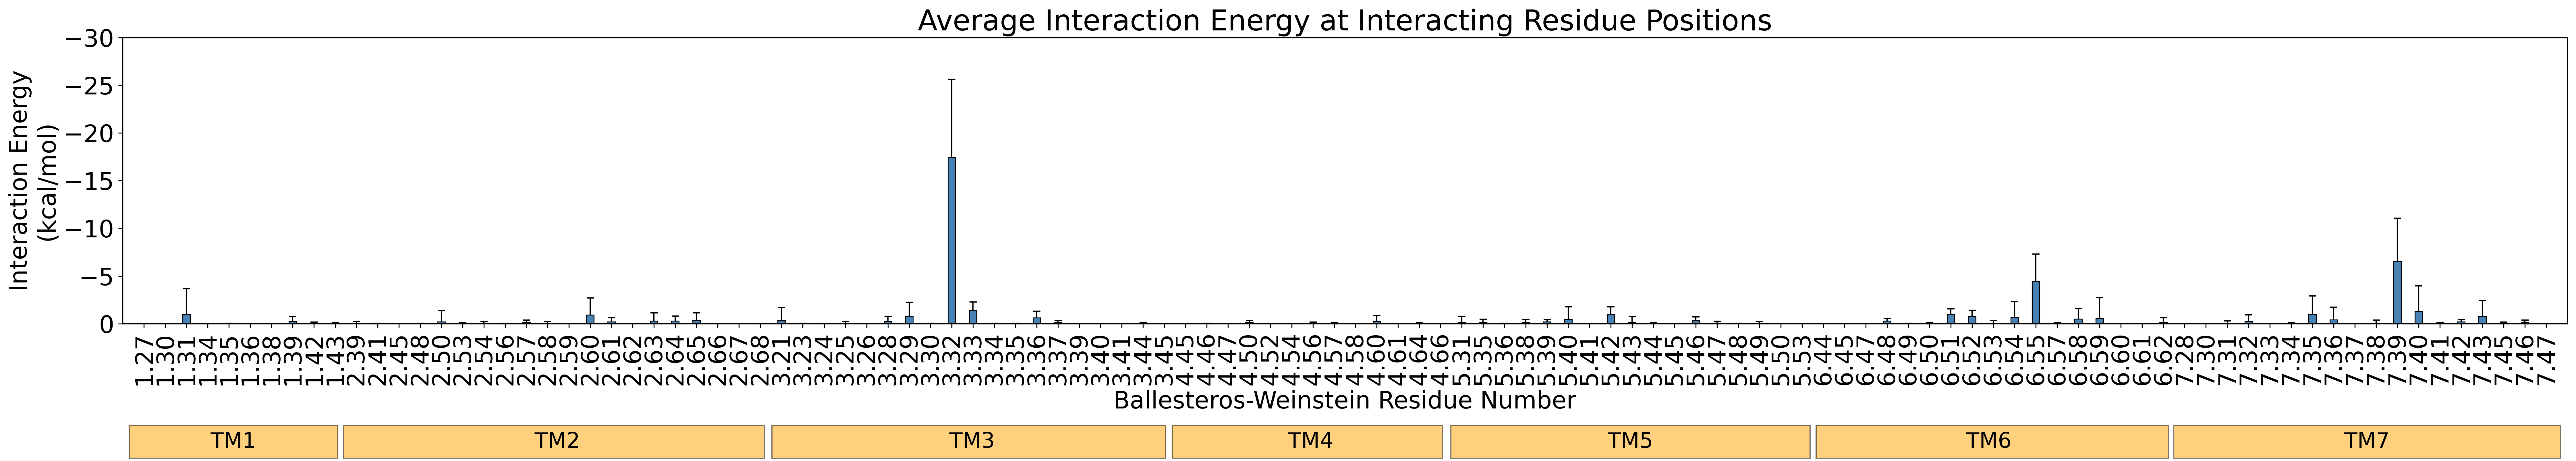

In [444]:
# 30 x 5 plot for PPT
matplotlib.rcParams['figure.figsize'] = [30, 5] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

x = np.arange(len(resnums))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# create rectangles for bar plot
rects = ax.bar(resnums, res_avgenergies, width, label=resnums, color = 'steelblue', edgecolor = "black", linewidth = 0.75)

# get indices of residues with non-zero error
nonzero_error_idxs = []

for error in res_stdevs:
    if error != 0:
        nonzero_error_idxs.append(res_stdevs.index(error))

# error bars for stdevs
# res_stdevs = [-999 if item == 0 else item for item in res_stdevs]
plt.errorbar(resnums, res_avgenergies, yerr=res_stdevs, fmt="none", color="black", capsize = 3, elinewidth = 1, zorder=0)

# Add label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Average Interaction Energy at Interacting Residue Positions", fontsize = 24)
ax.set_ylabel('Interaction Energy\n(kcal/mol)', fontsize = 20)
ax.set_xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

#set y axis limits and add a horizontal line at y = 0
#ax.set_ylim([10, -40])
ax.set_ylim([0, -30])
plt.axhline(y=0, color='black', linestyle='-', linewidth = 1)
plt.axvline(x=-1, color='black', linestyle='-', linewidth = 1)

fig.tight_layout()

# add TM labels
plt.figtext(0.092, -0.05, "           TM1           ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.2160, -0.05, "                           TM2                          ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.3765, -0.05, "                         TM3                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5075, -0.05, "                TM4               ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.6325, -0.05, "                      TM5                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.7725, -0.05, "                     TM6                      ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.9175, -0.05, "                        TM7                        ", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# stop leftmost bar from crowding x axis
plt.xlim([-1,len(resnums)])
plt.show()

fig.savefig('plots/364_int_energy_plot_30x5_ALL.jpg', bbox_inches='tight')

## Heatmap

In [2]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find residues where interactions are made

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty lists for column counts and residue numbers
int_counts = []
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

#len([x for x in int_counts if x != 0])

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])

# drop columns from df if no interactions are made at that residue
for resnum in non_int_resnums:
    for col in df.columns:
        if resnum in col:
            df.drop([col], axis = 1, inplace = True)

display(df)

# get list of interacting residues

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
resnums = []

for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)
    
print(resnums)
print(len(resnums))

index PDBID         State    Function  1.27_intenergysum 1.27_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                0.0          None   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.27_intenergy1 1.27_inttype2  1.27_intenergy2  1.30_intenergysum  ...  \
0                NaN           NaN              NaN                0.0  ...   
1                NaN           NaN              NaN                0.0  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                0.0  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                0.0  ...   
360              0.0          None              0.0                0.0  ...   
361              NaN           NaN              NaN                0.0  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.46_intenergysum  7.46_inttype1 7.46_intenergy1  7.46_inttype2  \
0                 0.0           None             0.0           None   
1                 0.0           None             0.0           None   
2                 0.0           None             0.0           None   
3                 0.0           None             0.0           None   
4                 0.0           None             0.0           None   
..                ...            ...             ...            ...   
359               0.0           None             0.0           None   
360               0.0           None             0.0           None   
361               0.0           None             0.0           None   
362               0.0           None             0.0           None   
363               0.0           None             0.0           None   

     7.46_intenergy2 7.47_intenergysum  7.47_inttype1 7.47_intenergy1  \
0                0.0               0.0           None             0.0   
1                0.0               0.0           None             0.0   
2                0.0               0.0           None             0.0   
3                0.0               0.0           None             0.0   
4                0.0               0.0           None             0.0   
..               ...               ...            ...             ...   
359              0.0               0.0           None             0.0   
360              0.0               0.0           None             0.0   
361              0.0               0.0           None             0.0   
362              0.0               0.0           None             0.0   
363              0.0               0.0           None             0.0   

     7.47_inttype2  7.47_intenergy2  
0             None              0.0  
1             None              0.0  
2             None              0.0  
3             None              0.0  
4             None              0.0  
..             ...              ...  
359           None              0.0  
360           None              0.0  
361           None              0.0

['1.27', '1.30', '1.31', '1.34', '1.35', '1.36', '1.38', '1.39', '1.42', '1.43', '2.39', '2.41', '2.45', '2.48', '2.50', '2.53', '2.54', '2.56', '2.57', '2.58', '2.59', '2.60', '2.61', '2.62', '2.63', '2.64', '2.65', '2.66', '2.67', '2.68', '3.21', '3.23', '3.24', '3.25', '3.26', '3.28', '3.29', '3.30', '3.32', '3.33', '3.34', '3.35', '3.36', '3.37', '3.39', '3.40', '3.41', '3.44', '3.45', '4.45', '4.46', '4.47', '4.50', '4.52', '4.54', '4.56', '4.57', '4.58', '4.60', '4.61', '4.64', '4.66', '5.31', '5.35', '5.36', '5.38', '5.39', '5.40', '5.41', '5.42', '5.43', '5.44', '5.45', '5.46', '5.47', '5.48', '5.49', '5.50', '5.53', '6.44', '6.45', '6.47', '6.48', '6.49', '6.50', '6.51', '6.52', '6.53', '6.54', '6.55', '6.57', '6.58', '6.59', '6.60', '6.61', '6.62', '7.28', '7.30', '7.31', '7.32', '7.33', '7.34', '7.35', '7.36', '7.37', '7.38', '7.39', '7.40', '7.41', '7.42', '7.43', '7.45', '7.46', '7.47']
114


In [3]:
# drop non 'intenergysum' columns
for col in df.columns[4:]:
    if 'intenergysum' not in col:
        df.drop([col], axis = 1, inplace = True)
        
display(df)

index PDBID         State    Function  1.27_intenergysum  \
0        1  7EW2        Active     Agonist                NaN   
1        2  7EW3        Active     Agonist                NaN   
2        3  7EW4        Active     Agonist                NaN   
3        4  7EW1        Active     Agonist                NaN   
4        5  7LD4        Active     Agonist                NaN   
..     ...   ...           ...         ...                ...   
359    387  5C1M        Active     Agonist                NaN   
360    388  4EJ4      Inactive  Antagonist                0.0   
361    389  4DKL      Inactive  Antagonist                NaN   
362    390  6Z10  Intermediate  Antagonist                0.0   
363    391  6RNK  Intermediate  Antagonist                0.0   

     1.30_intenergysum  1.31_intenergysum  1.34_intenergysum  \
0                  0.0           0.000000                0.0   
1                  0.0           0.000000                0.0   
2                  NaN                NaN                0.0   
3                  NaN           0.000000                0.0   
4                  0.0           0.000000                0.0   
..                 ...                ...                ...   
359                0.0           0.000000                0.0   
360                0.0           0.000000                0.0   
361                0.0           0.000000                0.0   
362                0.0           0.000000                0.0   
363                0.0         -23.808136                0.0   

     1.35_intenergysum  1.36_intenergysum  ...  7.37_intenergysum  \
0                  0.0                0.0  ...                0.0   
1                  0.0                0.0  ...                0.0   
2                  0.0                0.0  ...                0.0   
3                  0.0                0.0  ...                0.0   
4                  0.0                0.0  ...                0.0   
..                 ...                ...  ...                ...   
359                0.0                0.0  ...                0.0   
360                0.0                0.0  ...                0.0   
361                0.0                0.0  ...                0.0   
362                0.0                0.0  ...                0.0   
363                0.0                0.0  ...                0.0   

     7.38_intenergysum  7.39_intenergysum  7.40_intenergysum  \
0                  0.0           0.000000                0.0   
1                  0.0           0.000000                0.0   
2                  0.0           0.000000                0.0   
3                  0.0          -0.200000                0.0   
4                  0.0           0.000000                0.0   
..                 ...                ...                ...   
359                0.0           0.000000                0.0   
360                0.0          -0.100000                0.0   
361                0.0           0.000000                0.0   
362                0.0          -9.969280                0.0   
363                0.0         -12.189508                0.0   

     7.41_intenergysum  7.42_intenergysum  7.43_intenergysum  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0               -0.1               -0.6   
..                 ...                ...                ...   
359                0.0                0.0               -0.1   
360                0.0                0.0                0.0   
361                0.0                0.0               -0.2   
362                0.0                0.0                0.0   
363                0.0                0.0                0.0   

     7.45_intenergysum  7.46_intenergysum  7.47_intenergysum  
0                  0.0   

In [4]:
heatmap_df = df.iloc[:,np.r_[1, 4:len(df.columns)-1]]

In [5]:
heatmap_df = heatmap_df.set_index('PDBID')

In [6]:
# get residue nums to use as x-axis and rename columns
resnums = []

for col in heatmap_df.columns:
    resnum = col[:4]
    heatmap_df.rename(columns = {col: resnum}, inplace = True)
    resnums.append(resnum)

In [7]:
heatmap_df

1.27  1.30       1.31  1.34  1.35  1.36  1.38  1.39  1.42  1.43  ...  \
PDBID                                                                   ...   
7EW2    NaN   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7EW3    NaN   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7EW4    NaN   NaN        NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7EW1    NaN   NaN   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7LD4    NaN   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...     ...   ...        ...   ...   ...   ...   ...   ...   ...   ...  ...   
5C1M    NaN   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4EJ4    0.0   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4DKL    NaN   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6Z10    0.0   0.0   0.000000   0.0   0.0   0.0   0.0  -5.2   0.0   0.0  ...   
6RNK    0.0   0.0 -23.808136   0.0   0.0   0.0   0.0  -4.6   0.0   0.0  ...   

       7.36  7.37  7.38       7.39  7.40  7.41  7.42  7.43  7.45  7.46  
PDBID                                                                   
7EW2    0.0   0.0   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
7EW3    0.0   0.0   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
7EW4    0.0   0.0   0.0   0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
7EW1    0.0   0.0   0.0  -0.200000   0.0   0.0   0.0   0.0   0.0   0.0  
7LD4    0.0   0.0   0.0   0.000000   0.0   0.0  -0.1  -0.6   0.0   0.0  
...     ...   ...   ...        ...   ...   ...   ...   ...   ...   ...  
5C1M    0.0   0.0   0.0   0.000000   0.0   0.0   0.0  -0.1   0.0   0.0  
4EJ4    0.0   0.0   0.0  -0.100000   0.0   0.0   0.0   0.0   0.0   0.0  
4DKL    0.0   0.0   0.0   0.000000   0.0   0.0   0.0  -0.2   0.0   0.0  
6Z10    0.0   0.0   0.0  -9.969280   0.0   0.0   0.0   0.0   0.0   0.0  
6RNK    0.0   0.0   0.0 -12.189508   0.0   0.0   0.0   0.0   0.0   0.0  

[364 rows x 113 columns]

In [15]:
heatmap_df.index

Index(['7EW2', '7EW3', '7EW4', '7EW1', '7LD4', '7LD3', '7RM5', '7M8W', '7DB6',
       '7EXD',
       ...
       '6ZA8', '5T04', '4XEE', '4XES', '4GRV', '5C1M', '4EJ4', '4DKL', '6Z10',
       '6RNK'],
      dtype='object', name='PDBID', length=364)

In [16]:
PDBids = []
for PDBid in list(heatmap_df.index):
    # print(PDBid[0:4])
    PDBids.append(PDBid[0:4])

In [18]:
PDBids

['7EW2',
 '7EW3',
 '7EW4',
 '7EW1',
 '7LD4',
 '7LD3',
 '7RM5',
 '7M8W',
 '7DB6',
 '7EXD',
 '7C4S',
 '7CX3',
 '7CX2',
 '7CX4',
 '7E32',
 '7E2Z',
 '7E2Y',
 '7E33',
 '7JOZ',
 '7ARO',
 '7DFL',
 '7CMV',
 '7CMU',
 '7CRH',
 '7CKX',
 '7CKW',
 '7CKY',
 '7JV5',
 '7JVQ',
 '7JVP',
 '7JVR',
 '7K15',
 '7L1V',
 '7DDZ',
 '7DFP',
 '7DHI',
 '7DHR',
 '7BU7',
 '7BU6',
 '7BVQ',
 '7BTS',
 '6LPJ',
 '6LPL',
 '6LPK',
 '6WQA',
 '7D7M',
 '7BR3',
 '6WHA',
 '6WH4',
 '6WGT',
 '6ZDR',
 '6ZDV',
 '7CFM',
 '6KO5',
 '7BZ2',
 '6TPK',
 '7C61',
 '6S0L',
 '6S0Q',
 '6V9S',
 '6VMS',
 '6K41',
 '6K42',
 '6VI4',
 '6LUQ',
 '6U1N',
 '6LI0',
 '6KPG',
 '6PT0',
 '6KPF',
 '6KPC',
 '6TOT',
 '6TOS',
 '6TQ9',
 '6TP6',
 '6TQ6',
 '6TQ4',
 '6TOD',
 '6TP3',
 '6TP4',
 '6TQ7',
 '6TO7',
 '6TPG',
 '6TPN',
 '6TPJ',
 '6OL9',
 '6RZ8',
 '6RZ6',
 '6RZ9',
 '6RZ7',
 '6PT3',
 '6KUX',
 '6KUY',
 '6KUW',
 '6NI3',
 '6PS7',
 '6PRZ',
 '6PS1',
 '6PS2',
 '6PS4',
 '6PS6',
 '6PS0',
 '6PS5',
 '6PS3',
 '6PS8',
 '6JZH',
 '6RZ4',
 '6RZ5',
 '6K1Q',
 '6GT3',
 '6E67',
 

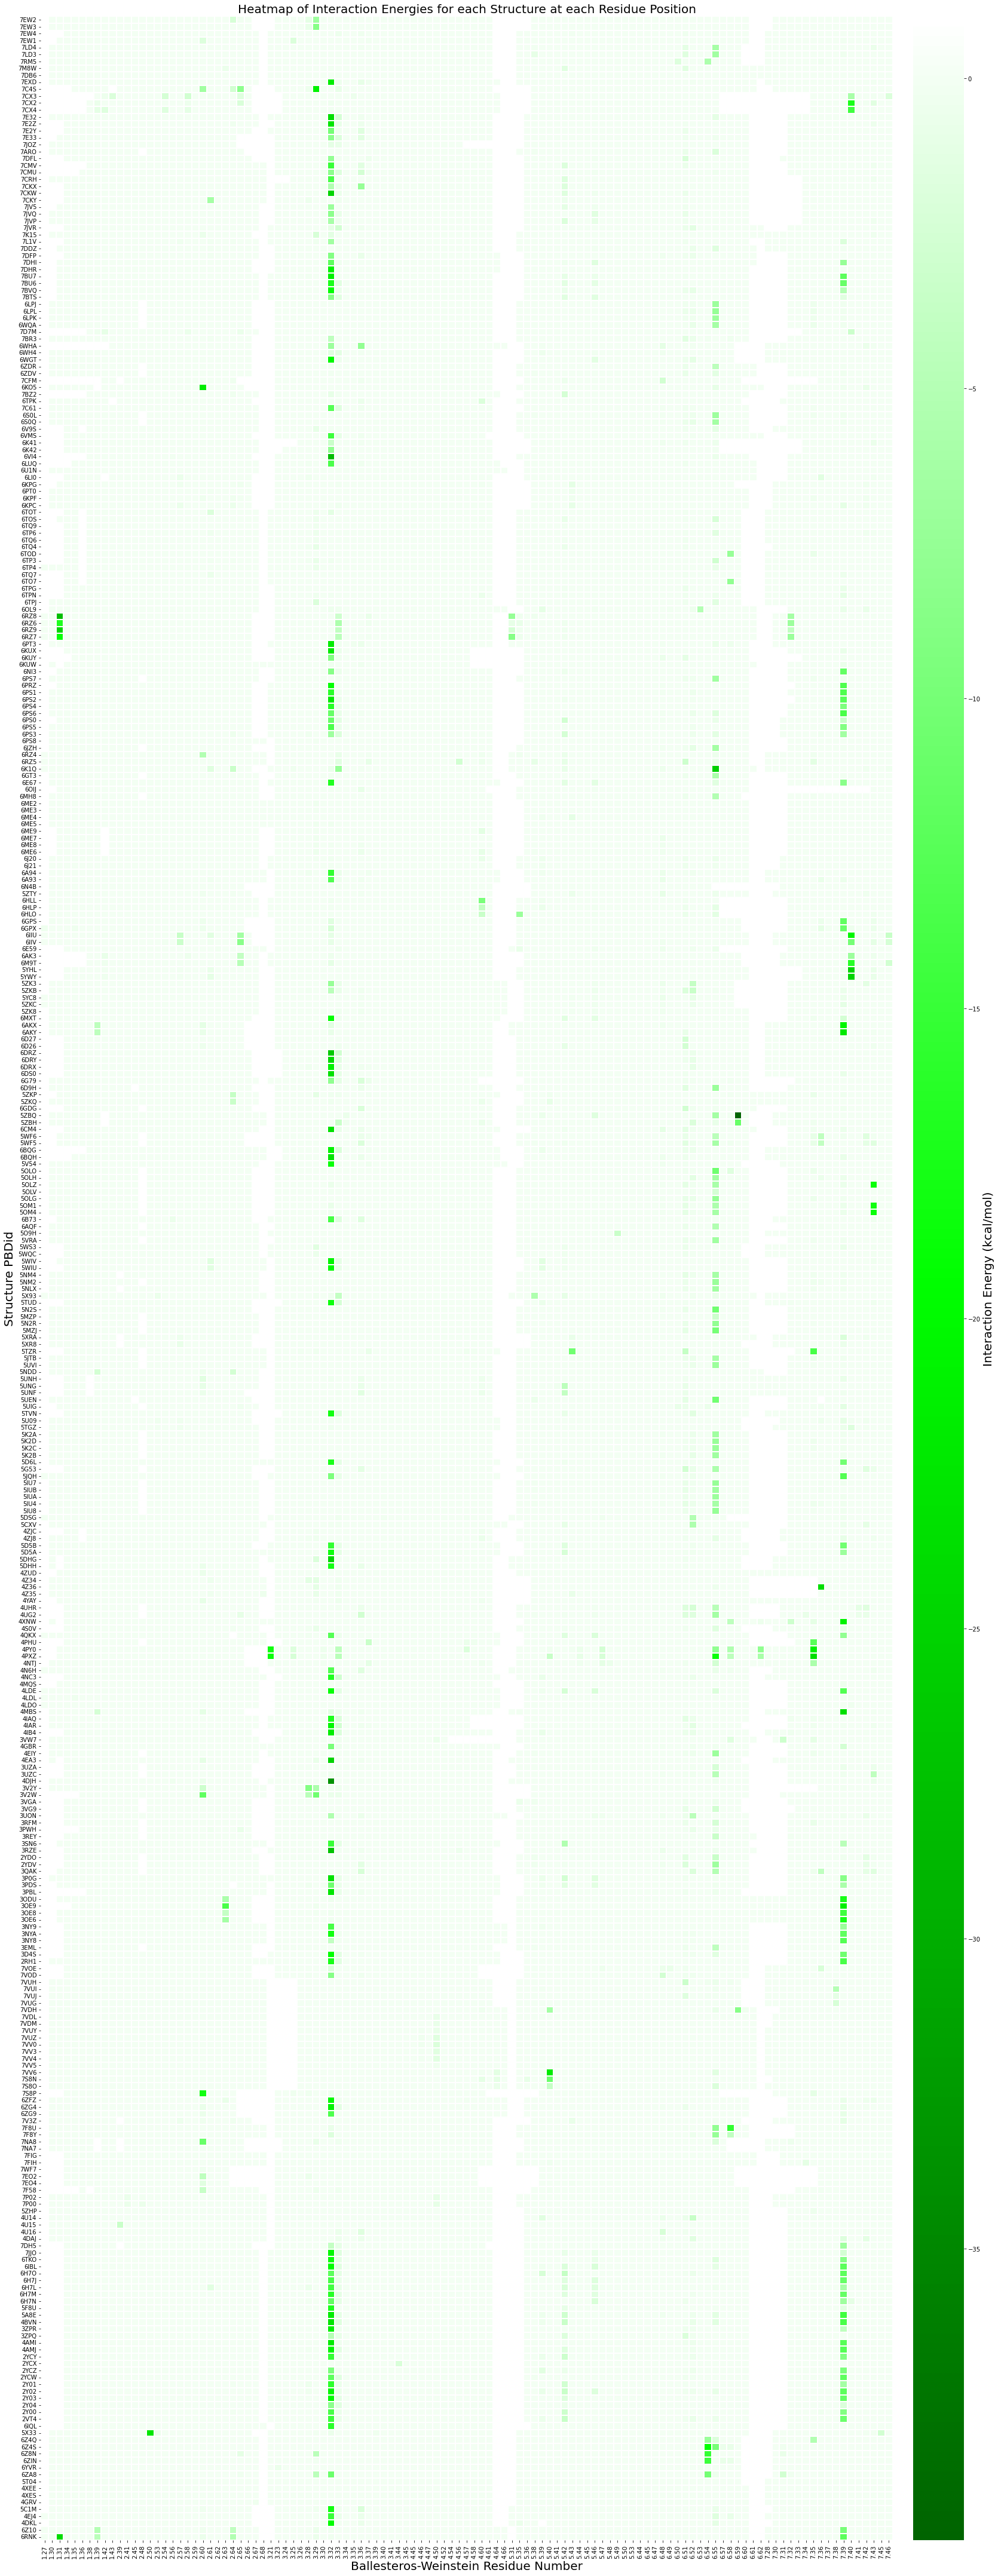

In [27]:
from matplotlib.colors import LinearSegmentedColormap

# get bigger plot
plt.subplots(figsize=(25,60), dpi = 72)

# generate custom white and black colormap
#cmap = LinearSegmentedColormap.from_list('redwhite', ['red', 'white'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])

ax = sns.heatmap(heatmap_df,
                 cmap = cmap,
                 xticklabels = resnums,
                 yticklabels = PDBids,
                 #linecolor='gray',
                 cbar_kws={'label': 'Interaction Energy (kcal/mol)', "aspect": 50, "pad":0.02},
                 linewidths = 0.30)

plt.title('Heatmap of Interaction Energies for each Structure at each Residue Position', fontsize = 20) # title with fontsize 20
plt.xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
plt.ylabel('Structure PBDid', fontsize = 20)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.tight_layout()
plt.savefig('plots/interacting_residues_energy_heatmap.png')

In [36]:
from matplotlib.colors import LinearSegmentedColormap

# get bigger plot
plt.subplots(figsize=(60,25), dpi = 72)

# generate custom white and black colormap
#cmap = LinearSegmentedColormap.from_list('redwhite', ['red', 'white'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])

ax = sns.heatmap(heatmap_df.transpose(),
                 cmap = cmap,
                 xticklabels = PDBids,
                 yticklabels = resnums,
                 #linecolor='gray',
                 cbar_kws={'label': 'Interaction Energy (kcal/mol)', "aspect": 50, "pad":0.02},
                 linewidths = 0.30)

plt.title('Heatmap of Interaction Energies for each Structure at each Residue Position', fontsize = 20) # title with fontsize 20
plt.ylabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
plt.xlabel('Structure PBDid', fontsize = 20)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.tight_layout()
plt.savefig('plots/interacting_residues_energy_heatmap_transposed.png')

In [33]:
display(heatmap_df.transpose())

PDBID  7EW2  7EW3  7EW4  7EW1  7LD4  7LD3  7RM5  7M8W  7DB6  7EXD  ...  6ZA8  \
1.27    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1.30    0.0   0.0   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1.31    0.0   0.0   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1.34    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1.35    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7.41    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7.42    0.0   0.0   0.0   0.0  -0.1  -0.1   0.0   0.0   0.0   0.0  ...   0.0   
7.43    0.0   0.0   0.0   0.0  -0.6   0.0   0.0   0.0   0.0  -0.2  ...   0.0   
7.45    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7.46    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

PDBID  5T04  4XEE  4XES  4GRV  5C1M  4EJ4  4DKL  6Z10       6RNK  
1.27    NaN   NaN   NaN   NaN   NaN   0.0   NaN   0.0   0.000000  
1.30    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
1.31    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -23.808136  
1.34    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
1.35    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
...     ...   ...   ...   ...   ...   ...   ...   ...        ...  
7.41    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
7.42    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
7.43    0.0   0.0   0.0   0.0  -0.1   0.0  -0.2   0.0   0.000000  
7.45    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  
7.46    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.000000  

[113 rows x 364 columns]

In [525]:
heatmap_df.to_csv('heatmap_df.csv')